# Why did the Sigmoid+SGD MLP perform so poorly compared to the others?
## our options were (Sigmoid, ReLU) x (Adam, SGD)
### whenever ReLU or Adam was involved, he results (in prediction on validation set) were okay.
For the Sigmoid + SGD combinaiton, results were way worse  
The graph of actual vs predicted looks like a poor attempt at a moving average of the actual/target values

- I wondered if this had to do with the Keras default settings of using
  - mini-batch of 32 samples/observations
  - random shuffiling of the data for each epoch
- So I turned these features ON/OFF for 4 more MLPs  


1. 1000 epoch 3layerx64 neuron, sigmoid, mini-batch 32, shuffling True (this is the default)
  - it performed poorly as mentioned
2. 1000 epoch 3layerx64 neuron, sigmoid, mini-batch 32, shuffling False
3. 1000 epoch 3layerx64 neuron, sigmoid, mini-batch 01, shuffling True
4. 1000 epoch 3layerx64 neuron, sigmoid, mini-batch 01, shuffling False

### Would the other 3 do better, due to turning off some of the defaults?
Keep in mind, mini-batch size =1, means we update the network after ONE record is passsed through, for EVERY record pass through. This, is the standard definition of gradient descent. The standard definition, aslo include sshuffling.

So Variant-3 would be normal gradien descent, whereas the default in mini-batch. atch graident descent, is athe other extreme, where the network is not updated until ALL observations have been passed through to/for the loss function.

In [1]:
result_filename = "MLP_sigsgd_variants_results.txt"
result_file = open(result_filename,'r')
results_datastring = result_file.read()
result_file.close()

read_output_text = results_datastring

In [2]:
print("text len: ",len(read_output_text))

rezsplit_a = read_output_text.split("\n")
print("split text len: ",len(rezsplit_a))
# Last line is just an empty new line. We remove it
print("last item in the split: ",rezsplit_a[-1].__repr__())
rezsplit_a.remove('')
print("split text len: ",len(rezsplit_a))
print('\n')

result_dict_list = [eval(rez) for rez in rezsplit_a]
print("dict len: ", len(result_dict_list))
print("dictionary keys: ",result_dict_list[0].keys())
print("1st item config: ",result_dict_list[0]["config"])
print("1st item min loss: ",min(result_dict_list[0]["result"]["loss"]))
print("1st item last loss: ",result_dict_list[0]["result"]["loss"][-1])

text len:  181049
split text len:  5
last item in the split:  ''
split text len:  4


dict len:  4
dictionary keys:  dict_keys(['epochs', 'config', 'result', 'setngs', 'compil'])
1st item config:  {'layers': 3, 'layer': {1: 64, 2: 64, 3: 64}}
1st item min loss:  0.0006276061132138368
1st item last loss:  0.0006370554707341953


#### Keras Model Config files

In [4]:
modelconfigfilenames = ["MLP_sigsgd_variants_results_01_jsconfig.json",
                        "MLP_sigsgd_variants_results_02_jsconfig.json",
                        "MLP_sigsgd_variants_results_03_jsconfig.json",
                        "MLP_sigsgd_variants_results_04_jsconfig.json"]

def multiload(flist):
    outp = {}
    for f in flist:
        a = open(f,'r')
        b = a.read()
        a.close()
        outp[f] = b
    return outp

mcf_stringdata = multiload(modelconfigfilenames)

In [5]:
mcf_stringdata[modelconfigfilenames[0]][:100]

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "co'

In [8]:
def str_to_json_of_results():
    for a in mcf_stringdata:
        replace_true = mcf_stringdata[a].replace("true","True")
        replace_null = replace_true.replace("null","None")
        evaled = eval(replace_null)
        mcf_stringdata[a] = evaled

In [7]:
mcf_stringdata["MLP_sigsgd_variants_results_01_jsconfig.json"]

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 9], "dtype": "float32", "units": 64, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 64, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint":

In [8]:
result_dict_list[0].keys()

dict_keys(['epochs', 'config', 'result', 'setngs', 'compil'])

### We added some keys to the model_info to know what is was
### We now have settings and compile info
#### these tell use the acitvation function, optimizer, mini-batch size and shuffling setting

In [9]:
def one_res_repr(rez_dict):
    j = ["compil","config","epochs","setngs"]
    d = {}
    for jj in j: d[jj] = rez_dict[jj]
    d["result"] = {"last_loss":rez_dict["result"]["loss"][-1],
                   "min_loss":min(rez_dict["result"]["loss"])}
    return d

In [16]:
for mdl in result_dict_list:
    print(mdl['setngs'])
    print(mdl['compil'])

{'activation': 'sigmoid', 'optimization': 'sgd'}
{'batchsize': 32, 'shuffled': True}
{'activation': 'sigmoid', 'optimization': 'sgd'}
{'batchsize': 32, 'shuffled': False}
{'activation': 'sigmoid', 'optimization': 'sgd'}
{'batchsize': 1, 'shuffled': True}
{'activation': 'sigmoid', 'optimization': 'sgd'}
{'batchsize': 1, 'shuffled': False}


In [10]:
len(result_dict_list)

4

In [12]:
one_res_repr(result_dict_list[0])

{'compil': {'batchsize': 32, 'shuffled': True},
 'config': {'layer': {1: 64, 2: 64, 3: 64}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.0006370554707341953,
  'min_loss': 0.0006276061132138368},
 'setngs': {'activation': 'sigmoid', 'optimization': 'sgd'}}

In [13]:
one_res_repr(result_dict_list[1])

{'compil': {'batchsize': 32, 'shuffled': False},
 'config': {'layer': {1: 64, 2: 64, 3: 64}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.0063049573691027, 'min_loss': 0.0063049573691027},
 'setngs': {'activation': 'sigmoid', 'optimization': 'sgd'}}

In [14]:
one_res_repr(result_dict_list[2])

{'compil': {'batchsize': 1, 'shuffled': True},
 'config': {'layer': {1: 64, 2: 64, 3: 64}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.00030618683591578837,
  'min_loss': 0.00030509430164841426},
 'setngs': {'activation': 'sigmoid', 'optimization': 'sgd'}}

In [15]:
one_res_repr(result_dict_list[3])

{'compil': {'batchsize': 1, 'shuffled': False},
 'config': {'layer': {1: 64, 2: 64, 3: 64}, 'layers': 3},
 'epochs': 1000,
 'result': {'last_loss': 0.0006672521721122166,
  'min_loss': 0.0005605080057906733},
 'setngs': {'activation': 'sigmoid', 'optimization': 'sgd'}}

- Now for the MSE loss

In [16]:
MSE_loss_results = [{"compiled_as":item["compil"],
                    "last_loss": item["result"]["loss"][-1]} for item in result_dict_list]
print(MSE_loss_results[0])

{'compiled_as': {'batchsize': 32, 'shuffled': True}, 'last_loss': 0.0006370554707341953}


In [17]:
MSE_loss_results

[{'compiled_as': {'batchsize': 32, 'shuffled': True},
  'last_loss': 0.0006370554707341953},
 {'compiled_as': {'batchsize': 32, 'shuffled': False},
  'last_loss': 0.0063049573691027},
 {'compiled_as': {'batchsize': 1, 'shuffled': True},
  'last_loss': 0.00030618683591578837},
 {'compiled_as': {'batchsize': 1, 'shuffled': False},
  'last_loss': 0.0006672521721122166}]

#### $\checkmark$ verified

So Model 3, that used true gradien descent (batch=1, shuffle=true) far outperformed the others

0.00030618683591578837 - Model 3: 1, True  
0.0006370554707341953 - Model 1: 32, True  
0.0006672521721122166 - Model 4: 1, False  
0.0063049573691027 - Model 2: 32, False  


### The Main culprit for poor performance of he MLP was the batch size
#### No! However, shuffling made up for poor batch size.
#### Not shuffling looks to be a worse setting a larger batch
With Shuffling:
- going from batch size 32, down to 1, improved things by ~50+%

Without Shuffling:  
- going from batch size 32, down to 1, improved things by ~90+%


In the other comparison across activation and optmizer, the score for the 32,True Model was `0.0007770861919336144`.

We got a better result for out Model-02, just from the fact that the random shuffling will be different.

However, notice hot Model-03 is better by far.
It's still worse than the other activation$*$optimization variants. However, it's much closer.


# Recap of activation cross optimization

### 1st ReLU Adam @ 0.00015391332836281476

#### 2nd Sigmoid Adam @ 0.00020681091811140635

#### 3rd ReLU SGD @ 0.0002592734960518722

#### 4th Sigmoid SGD @ 0.0007770861919336144 (original)

# New Result

### 1st ReLU Adam @ 0.00015391332836281476

#### 2nd Sigmoid Adam @ 0.00020681091811140635

#### 3rd ReLU SGD @ 0.0002592734960518722

#### 4th Sigmoid SGD @ 0.00030618683591578837 (batch 1, shuffling True)

#### 5th Sigmoid SGD @ 0.0007770861919336144 (batch 32, shuffling True)

In [26]:
superes = [0.00015391332836281476,0.00020681091811140635,
 0.0002592734960518722,0.00030618683591578837,
 0.0007770861919336144]

In [27]:
max(superes)

0.0007770861919336144

In [28]:
min(superes)

0.00015391332836281476

In [29]:
superes.sort()

In [30]:
superes

[0.00015391332836281476,
 0.00020681091811140635,
 0.0002592734960518722,
 0.00030618683591578837,
 0.0007770861919336144]

### Let's Graph the loss progression

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
model01_lossprogression = result_dict_list[0]["result"]["loss"]
model02_lossprogression = result_dict_list[1]["result"]["loss"]
model03_lossprogression = result_dict_list[2]["result"]["loss"]
model04_lossprogression = result_dict_list[3]["result"]["loss"]

In [26]:
result_dict_list[0]["compil"]

{'batchsize': 32, 'shuffled': True}

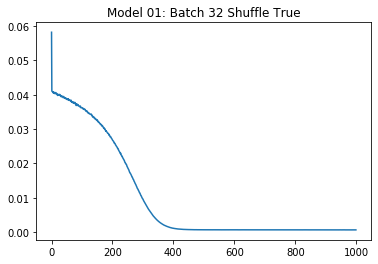

In [27]:
plt.plot(model01_lossprogression[0:])
plt.title("Model 01: Batch 32 Shuffle True")
plt.show()

In [28]:
result_dict_list[1]["compil"]

{'batchsize': 32, 'shuffled': False}

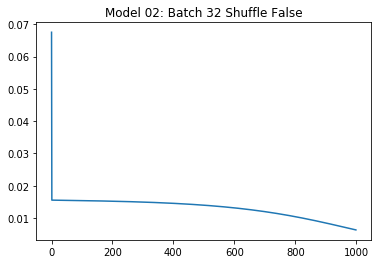

In [29]:
plt.plot(model02_lossprogression[0:])
plt.title("Model 02: Batch 32 Shuffle False")
plt.show()

In [30]:
result_dict_list[2]["compil"]

{'batchsize': 1, 'shuffled': True}

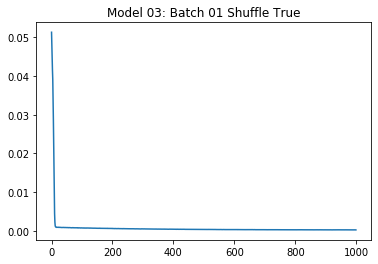

In [31]:
plt.plot(model03_lossprogression[0:])
plt.title("Model 03: Batch 01 Shuffle True")
plt.show()

In [32]:
result_dict_list[3]["compil"]

{'batchsize': 1, 'shuffled': False}

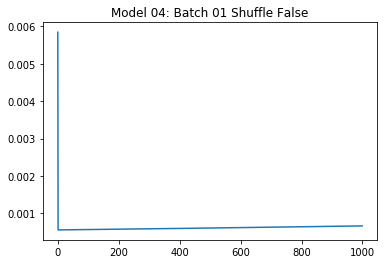

In [38]:
plt.plot(model04_lossprogression[0:])
plt.title("Model 04: Batch 01 Shuffle False")
plt.show()

#### extra plots of loss

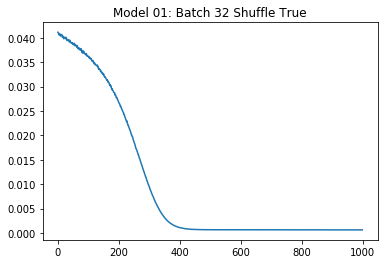

In [39]:
plt.plot(model01_lossprogression[1:])
plt.title("Model 01: Batch 32 Shuffle True")
plt.show()

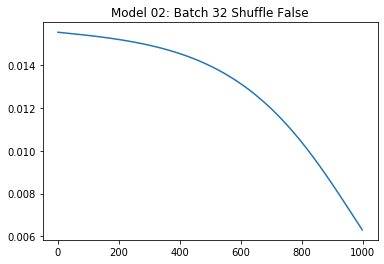

In [40]:
plt.plot(model02_lossprogression[1:])
plt.title("Model 02: Batch 32 Shuffle False")
plt.show()

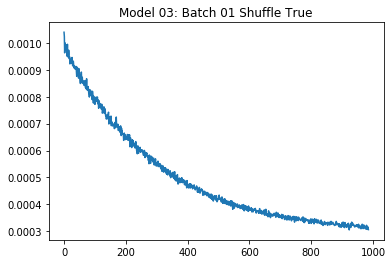

In [41]:
plt.plot(model03_lossprogression[14:])
plt.title("Model 03: Batch 01 Shuffle True")
plt.show()

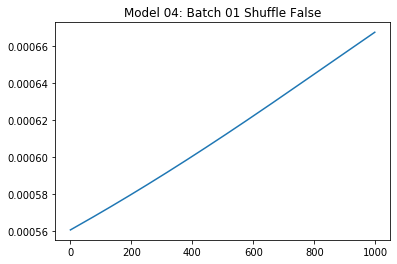

In [42]:
plt.plot(model04_lossprogression[1:])
plt.title("Model 04: Batch 01 Shuffle False")
plt.show()

### Let's graph the forecast

In [43]:
modelconfigfilenames

['MLP_sigsgd_variants_results_01_jsconfig.json',
 'MLP_sigsgd_variants_results_02_jsconfig.json',
 'MLP_sigsgd_variants_results_03_jsconfig.json',
 'MLP_sigsgd_variants_results_04_jsconfig.json']

In [44]:
modelconfigfilenames = ('MLP_sigsgd_variants_results_01_jsconfig.json',
                        'MLP_sigsgd_variants_results_02_jsconfig.json',
                        'MLP_sigsgd_variants_results_03_jsconfig.json',
                        'MLP_sigsgd_variants_results_04_jsconfig.json')

In [45]:
modelweightfilenames = ("MLP_sigsgd_variants_results_01_weights.h5",
                        "MLP_sigsgd_variants_results_02_weights.h5",
                        "MLP_sigsgd_variants_results_03_weights.h5",
                        "MLP_sigsgd_variants_results_04_weights.h5")

In [47]:
import pandas as pd
import os
import numpy as np
import datetime

# other imports
import inspect
import sys
import time

# the file
snpnormfile = "../Reuters Data Copy/SandP500/snp_normalized_lagged.csv"
snp_a_data = pd.read_csv(snpnormfile,parse_dates=['Local_Datetime'],
                         index_col=0)

# just to keep from changing to many variable names below
snp_data_chrono = snp_a_data

# define MLP dataset
# we need to leave a validation set, which we can use for test later
y = snp_data_chrono['Close']
y_train = y.iloc[:1347-135]
y_validation = y.iloc[1347-135:]
X_train = snp_data_chrono.iloc[:1347-135,2:]
X_validation = snp_data_chrono.iloc[1347-135:,2:]

# for NN first imports
# for tensorflow with keras
import tensorflow
# due to a problem on Windows, force the aliasing
sys.modules['keras'] = tensorflow.keras

# for NN second imports
from keras.models import Sequential
from keras.layers import Dense

In [48]:
from keras.models import model_from_json

In [49]:
def get_model_config(mdlfn):
    stored_model_info = open(mdlfn,'r')
    loaded_model_info = stored_model_info.read()
    stored_model_info.close()
    loaded_model = model_from_json(loaded_model_info)
    return loaded_model


In [95]:
conf1, conf2, conf3, conf4 =[get_model_config(z) for z in modelconfigfilenames]

In [51]:
conf1 = get_model_config(modelconfigfilenames[0])
conf2 = get_model_config(modelconfigfilenames[1])
conf3 = get_model_config(modelconfigfilenames[2])
conf4 = get_model_config(modelconfigfilenames[3])

In [52]:
conf1.load_weights(modelweightfilenames[0])
conf2.load_weights(modelweightfilenames[1])
conf3.load_weights(modelweightfilenames[2])
conf4.load_weights(modelweightfilenames[3])

In [53]:
MSE_loss_results

[{'compiled_as': {'batchsize': 32, 'shuffled': True},
  'last_loss': 0.0006370554707341953},
 {'compiled_as': {'batchsize': 32, 'shuffled': False},
  'last_loss': 0.0063049573691027},
 {'compiled_as': {'batchsize': 1, 'shuffled': True},
  'last_loss': 0.00030618683591578837},
 {'compiled_as': {'batchsize': 1, 'shuffled': False},
  'last_loss': 0.0006672521721122166}]

### Model Order
- Model 01: 32 True
- Model 02: 32 False
- Model 03: 01 True
- Model 04: 01 False

### Model Rank by MSE on training set
`Model 3: 01, True  ; 0.00030618683591578837`  
`Model 1: 32, True  ; 0.0006370554707341953`  
`Model 4: 01, False ; 0.0006672521721122166`  
`Model 2: 32, False ; 0.0063049573691027`  


In [54]:
conf1.compile(loss='MSE', optimizer='sgd', metrics=['mape'])
conf2.compile(loss='MSE', optimizer='sgd', metrics=['mape'])
conf3.compile(loss='MSE', optimizer='sgd', metrics=['mape'])
conf4.compile(loss='MSE', optimizer='sgd', metrics=['mape'])

In [55]:
conf1.metrics_names

['loss', 'mean_absolute_percentage_error']

In [56]:
score1,score2,score3,score4 = [confx.evaluate(X_validation, y_validation, verbose=0)
                               for confx in (conf1,conf2,conf3,conf4)]

In [57]:
score1 = conf1.evaluate(X_validation, y_validation, verbose=0)
score2 = conf2.evaluate(X_validation, y_validation, verbose=0)
score3 = conf3.evaluate(X_validation, y_validation, verbose=0)
score4 = conf4.evaluate(X_validation, y_validation, verbose=0)

In [58]:
for scoring in (score1,score2,score3,score4): print(scoring)

[0.001073337407110052, 3.2138515]
[0.0032521807985311305, 5.6869316]
[6.666812286884697e-05, 0.6492938]
[0.0022148624976614005, 4.4016714]


Based on the forecasts, the ranking is still the same:  

#### Model Rank by MSE on validation set
3,1,4,2
#### Model Rnak by MAPE on validation set
3,1,4,2

Model 01 here (32 True) which coincides with Model 04 in the other comparison (sigmoid sgd), gets a similar MAPE: 
- 3.213 here, vs 3.416 there.

### Now we Graph

In [59]:
y_targets_array = np.array(y_validation)

In [60]:
ready_models = (conf1,conf2,conf3,conf4)
testpred_list = tuple(mdl.predict(X_validation) for mdl in ready_models)

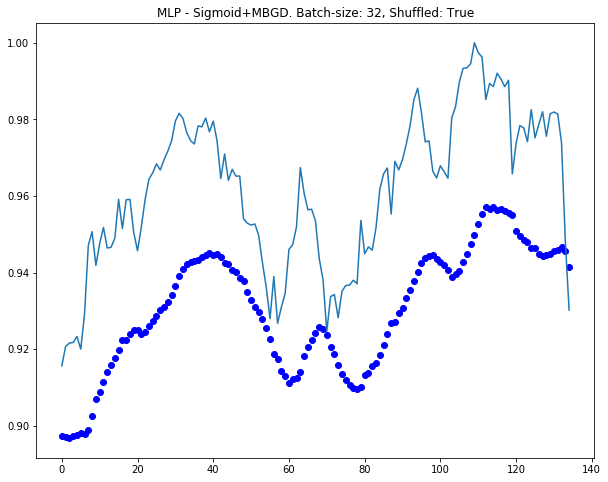

In [67]:
plt.figure(figsize=(10,8))
plt.plot(testpred_list[0], 'bo')
plt.plot(y_targets_array)
plt.title("MLP - Sigmoid+MBGD. Batch-size: 32, Shuffled: True")
plt.show()

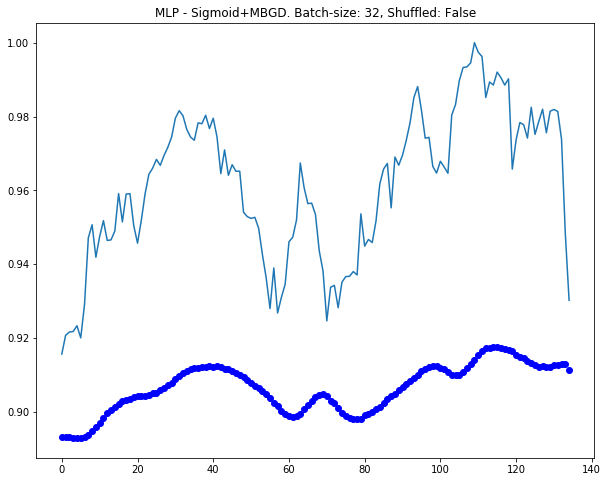

In [65]:
plt.figure(figsize=(10,8))
plt.plot(testpred_list[1], 'bo')
plt.plot(y_targets_array)
plt.title("MLP - Sigmoid+MBGD. Batch-size: 32, Shuffled: False")
plt.show()

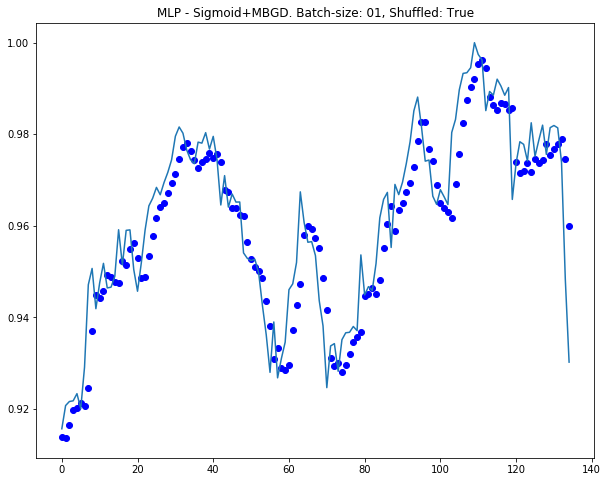

In [68]:
plt.figure(figsize=(10,8))
plt.plot(testpred_list[2], 'bo')
plt.plot(y_targets_array)
plt.title("MLP - Sigmoid+MBGD. Batch-size: 01, Shuffled: True")
plt.show()

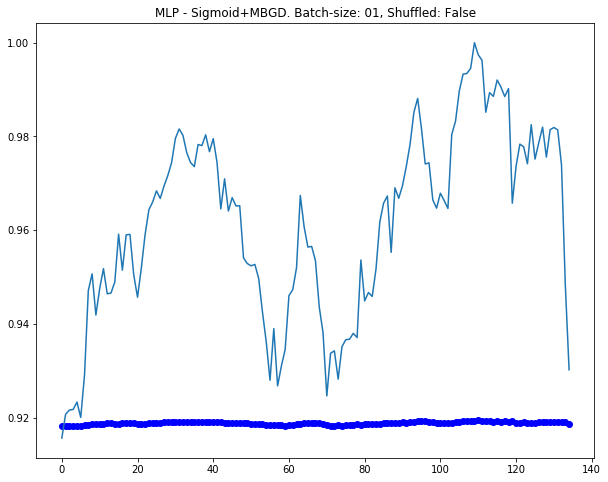

In [66]:
plt.figure(figsize=(10,8))
#plt.plot(conf4.predict(X_validation),'bo')
plt.plot(testpred_list[3], 'bo')
plt.plot(y_targets_array)
plt.title("MLP - Sigmoid+MBGD. Batch-size: 01, Shuffled: False")
plt.show()